## H2 VQE using a user-defined Hamiltonion

This notebook feautures a VQE trial that uses a user-defined Hamiltonian, namely, the hamiltonian used in Yamamoto (2019) in the 2-qubit example. We examine the performance of the quantum natural gradient compared to the the vanilla gradient descent optimizer for this small VQE problem.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

import pennylane as qml
from pennylane import Hamiltonian, VQECost

import sys
sys.path.append('../')
from run_vqe import *

In [2]:
dev = qml.device("default.qubit", wires=2)

#create ansatz 
def ansatz(params, wires):
    qml.BasisState(np.array([1, 0]), wires=wires)
    
    #parameterized layer 0
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    
    #entanglement
    qml.CNOT(wires=[0,1])
    
    #param layer 1
    qml.RY(params[2], wires=0)
    qml.RY(params[3], wires=1)


In [3]:
alpha = 0.4
beta = 0.2
coeffs = [alpha, alpha, beta]

#H2 hamiltonian from Yamamoto 2019
obs_list = [
    qml.PauliZ(0) @ qml.Identity(1),
    qml.Identity(0) @ qml.PauliZ(1),
    qml.PauliX(0) @ qml.PauliX(1)
]

#create qnodes
ham = qml.Hamiltonian(coeffs, obs_list)

#create cost function
cost = VQECost(ansatz, ham, dev)

init_params = np.array([-0.2,-0.2,0,0])
max_iter = 200
step_size = 0.05

In [4]:
print("QNG RUN")
qng_run, qng_n_steps = run_vqe(cost_fn=cost, 
                               max_iter=max_iter, 
                               initial_params=init_params, 
                               opt_name='QNGOptimizer', 
                               step_size=step_size, 
                               diag_approx=False)

QNG RUN
Iteration = 0,  Energy = -0.76268501 Ha,  Convergence parameter = 0.02618004 Ha
Iteration = 20,  Energy = -0.82444782 Ha,  Convergence parameter = 0.00004115 Ha
Iteration = 40,  Energy = -0.82461577 Ha,  Convergence parameter = 0.00000094 Ha

Final value of the energy = -0.82461577
Number of iterations =  40


In [5]:
print("VANILLA RUN")
vanilla_run, vanilla_n_steps = run_vqe(cost_fn=cost, 
                               max_iter=max_iter, 
                               initial_params=init_params, 
                               opt_name='GradientDescentOptimizer', 
                               step_size=step_size)

VANILLA RUN
Iteration = 0,  Energy = -0.74338143 Ha,  Convergence parameter = 0.00687646 Ha
Iteration = 20,  Energy = -0.80872512 Ha,  Convergence parameter = 0.00133575 Ha
Iteration = 40,  Energy = -0.82127028 Ha,  Convergence parameter = 0.00025922 Ha
Iteration = 60,  Energy = -0.82378251 Ha,  Convergence parameter = 0.00005537 Ha
Iteration = 80,  Energy = -0.82435602 Ha,  Convergence parameter = 0.00001416 Ha
Iteration = 100,  Energy = -0.82451772 Ha,  Convergence parameter = 0.00000458 Ha
Iteration = 120,  Energy = -0.82457521 Ha,  Convergence parameter = 0.00000181 Ha

Final value of the energy = -0.82459505
Number of iterations =  135


In [6]:
exact_energy = -np.sqrt(4*alpha**2 + beta**2)

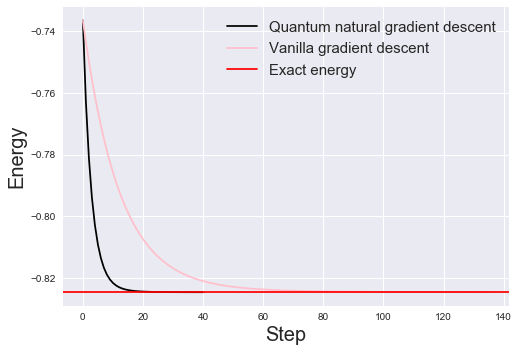

In [7]:
plt.style.use("seaborn")
ax = plt.axes()
plt.plot(qng_run, "black", label="Quantum natural gradient descent")
plt.plot(vanilla_run, "pink", label="Vanilla gradient descent")

plt.ylabel("Energy", fontsize=20)
plt.xlabel("Step", fontsize=20)

ax.axhline(y=exact_energy, label='Exact energy', color='r')
plt.legend(fontsize=15)
plt.show()